<a href="https://colab.research.google.com/github/sarmadsaleem333/Patient-Dropout-Classifier/blob/main/Assignment_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**
# Assignment No 1

#Question:
The goal of this assignment is to apply logistic regression, feature scaling, multicollinearity handling, and model evaluation techniques to solve a real-world problem. By the end of the assignment, you will understand logistic regression and how to handle the challenges of feature scaling, multicollinearity, and imbalanced data.


# **Importing all necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# **Data Exploration and Preprocessing**

Loading the dataset

In [ ]:
data=pd.read_csv("/content/data_patient_dropout.csv")


Printing first few values


In [ ]:
data.head()

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [ ]:
data.tail()

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
4279,ID_4279,Yes,23,5.0,6,2.0,0,0,3,0,7,2,1
4280,ID_4280,No,7,2.0,0,3.0,0,0,1,0,0,0,1
4281,ID_4281,No,4,1.0,0,1.0,0,1,1,0,0,0,1
4282,ID_4282,No,8,3.0,0,1.0,0,1,1,0,2,1,1
4283,ID_4283,No,31,4.0,0,3.0,0,1,7,0,1,1,1


Checking size of dataset





In [ ]:
data.shape

(4284, 13)

Number of patients dropped out and non dropped out

In [ ]:
data["Treatment Dropped"].value_counts()

,count
Treatment Dropped,
1,3668
0,616


Checking for null values

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Initial Consultation Attended,0
Number of Treatment Sessions Attended,0
Number of Treatment Goals Set,9
Number of Treatment Goals Revised,0
Number of Progress Reviews Attended,9
Number of Times Treatment Plan Confirmed,0
Number of Times Treatment Phase Initiated,0
Number of Treatment Options Explored,0
Number of Times Logged Into Health Portal,0


# Replacing the null values with mean value of the other column values:

If the data is normalized we should go for Mean
If data is non-normalized/skewed or outlier are there  then we should go for Median

# Test for normalization:
Skewed : if skewness is positive(right) / negative (left)
Normal If zero or close to zero

In [ ]:
print("Skewness for Number of Treatment Goals Set ",data["Number of Treatment Goals Set"].skew())
print("Skewness forNumber of Progress Reviews Attended ",data["Number of Progress Reviews Attended"].skew())

Skewness for Number of Treatment Goals Set  17.620771963055336
Skewness forNumber of Progress Reviews Attended  5.082517553871084


Both are highly skewed so we should go for median

In [ ]:
data["Number of Treatment Goals Set"].fillna(data["Number of Treatment Goals Set"].median(),inplace=True)
data["Number of Progress Reviews Attended"].fillna(data["Number of Progress Reviews Attended"].median(),inplace=True)

<ipython-input-11-4d5d85787e41>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Number of Treatment Goals Set"].fillna(data["Number of Treatment Goals Set"].median(),inplace=True)
<ipython-input-11-4d5d85787e41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

# After replacing the values

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Initial Consultation Attended,0
Number of Treatment Sessions Attended,0
Number of Treatment Goals Set,0
Number of Treatment Goals Revised,0
Number of Progress Reviews Attended,0
Number of Times Treatment Plan Confirmed,0
Number of Times Treatment Phase Initiated,0
Number of Treatment Options Explored,0
Number of Times Logged Into Health Portal,0


# Feature Scaling:
Feature scaling is a crucial step in preprocessing data for machine learning algorithms. It involves rescaling the features so that they share a common scale, without distorting differences in the range of values. Feature scaling ensures that the learning algorithm behaves as expected and often leads to better performance, especially for certain models

1.Min max Scaling


2.Standard Scaling


Use Standard Scaling when data is normal and Min max when data orientation is not known




# Checking Data Normalization

In [ ]:

features = ['Number of Treatment Sessions Attended',
                   'Number of Treatment Goals Set', 'Number of Treatment Goals Revised',
                   'Number of Progress Reviews Attended', 'Number of Times Treatment Plan Confirmed',
                   'Number of Times Treatment Phase Initiated', 'Number of Treatment Options Explored',
                   'Number of Times Logged Into Health Portal', 'Number of Educational Resources Viewed']

for feature in features:
  print("Skewness of",feature ," is: ",data[feature].skew())



Skewness of Number of Treatment Sessions Attended  is:  9.192731412758544
Skewness of Number of Treatment Goals Set  is:  17.63798709741966
Skewness of Number of Treatment Goals Revised  is:  7.264247577792749
Skewness of Number of Progress Reviews Attended  is:  5.088457301680332
Skewness of Number of Times Treatment Plan Confirmed  is:  6.106870149217233
Skewness of Number of Times Treatment Phase Initiated  is:  2.8379680731539305
Skewness of Number of Treatment Options Explored  is:  22.175313590638684
Skewness of Number of Times Logged Into Health Portal  is:  2.235246811824483
Skewness of Number of Educational Resources Viewed  is:  3.4930843691486677


As majority of data is skewed so we should use min max scaling here


# Min Max Scaling

In [ ]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [ ]:
data.head()

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0,1
1,ID_1,No,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0,1
2,ID_2,No,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,1,0
3,ID_3,No,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.0,0.000000,0,1
4,ID_4,Yes,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.0,0.000000,2,1


In [ ]:
data.describe()
# we can say min is 0 and max is 1 and dataset is b/w 1 and 0

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
count,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,0.031831,0.015490,0.017344,0.042449,0.017019,0.070011,0.008969,0.056411,0.067100,0.563259,0.856209
std,0.036546,0.030145,0.061400,0.061188,0.047063,0.081466,0.023643,0.133433,0.081967,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013761,0.004444,0.000000,0.000000,0.000000,0.000000,0.003906,0.000000,0.028571,0.000000,1.000000
50%,0.022936,0.008889,0.000000,0.029412,0.000000,0.071429,0.003906,0.000000,0.057143,0.000000,1.000000
75%,0.038991,0.022222,0.000000,0.058824,0.000000,0.071429,0.007812,0.000000,0.085714,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


# One Hot Encoding

For string and number data we have to convert into numbers before training because they are not understandable by computers so converting them in numbers 2 ways:

**1.One hot encoding**


When the categories are nominal (i.e., there is no meaningful order)


**2.Label Encoding**

When categories are ordinal (i.e., they have a meaningful order)

In our case the categories Initial Consultation Attended is nominal Yes or No so use one hot encoding

In [ ]:
data = pd.get_dummies(data,columns=['Initial Consultation Attended'], drop_first=True)
# here drop first will make one use of column to represent i.e if there is Red yellow or blue then if red is true then other two will be false so instead of writing all columns we usr 2 columns if two are false then third one will be true

In [ ]:
# Converting boolean values to int
data["Initial Consultation Attended_Yes"]=data["Initial Consultation Attended_Yes"].astype(int)

In [ ]:
# after appplying one hot encoding to initial consultant column

data.head()

,Patient ID,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_Yes
0,ID_0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0,1,1
1,ID_1,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0,1,0
2,ID_2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,1,0,0
3,ID_3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.0,0.000000,0,1,0
4,ID_4,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.0,0.000000,2,1,1


We dont need Ids of patient so dropping them

In [ ]:
data.drop("Patient ID",axis=1,inplace=True)

In [ ]:
data.head()

,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped,Initial Consultation Attended_Yes
0,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.0,0.000000,0,1,1
1,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.0,0.057143,0,1,0
2,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.0,0.000000,1,0,0
3,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.0,0.000000,0,1,0
4,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.0,0.000000,2,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Number of Treatment Sessions Attended      4284 non-null   float64
 1   Number of Treatment Goals Set              4284 non-null   float64
 2   Number of Treatment Goals Revised          4284 non-null   float64
 3   Number of Progress Reviews Attended        4284 non-null   float64
 4   Number of Times Treatment Plan Confirmed   4284 non-null   float64
 5   Number of Times Treatment Phase Initiated  4284 non-null   float64
 6   Number of Treatment Options Explored       4284 non-null   float64
 7   Number of Times Logged Into Health Portal  4284 non-null   float64
 8   Number of Educational Resources Viewed     4284 non-null   float64
 9   Patient Segment Type                       4284 non-null   int64  
 10  Treatment Dropped       

# Outliers in Dataset:
Outliers can distort a model’s predictions by disproportionately influencing the learning process, especially in models sensitive to the scale of input (like linear regression, k-means, and gradient-based models). They can lead to skewed coefficients, incorrect decision boundaries, and reduced model accuracy.

# Box Plots

<ipython-input-31-ea996ed44174>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette='viridis')  # Change palette for better aesthetics
<ipython-input-31-ea996ed44174>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette='viridis')  # Change palette for better aesthetics
<ipython-input-31-ea996ed44174>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette='viridis')  # Change palette for better aesthetics
<ipython-input-31-ea996ed44174>:13: FutureWarning: 

Passing `palette` without assign

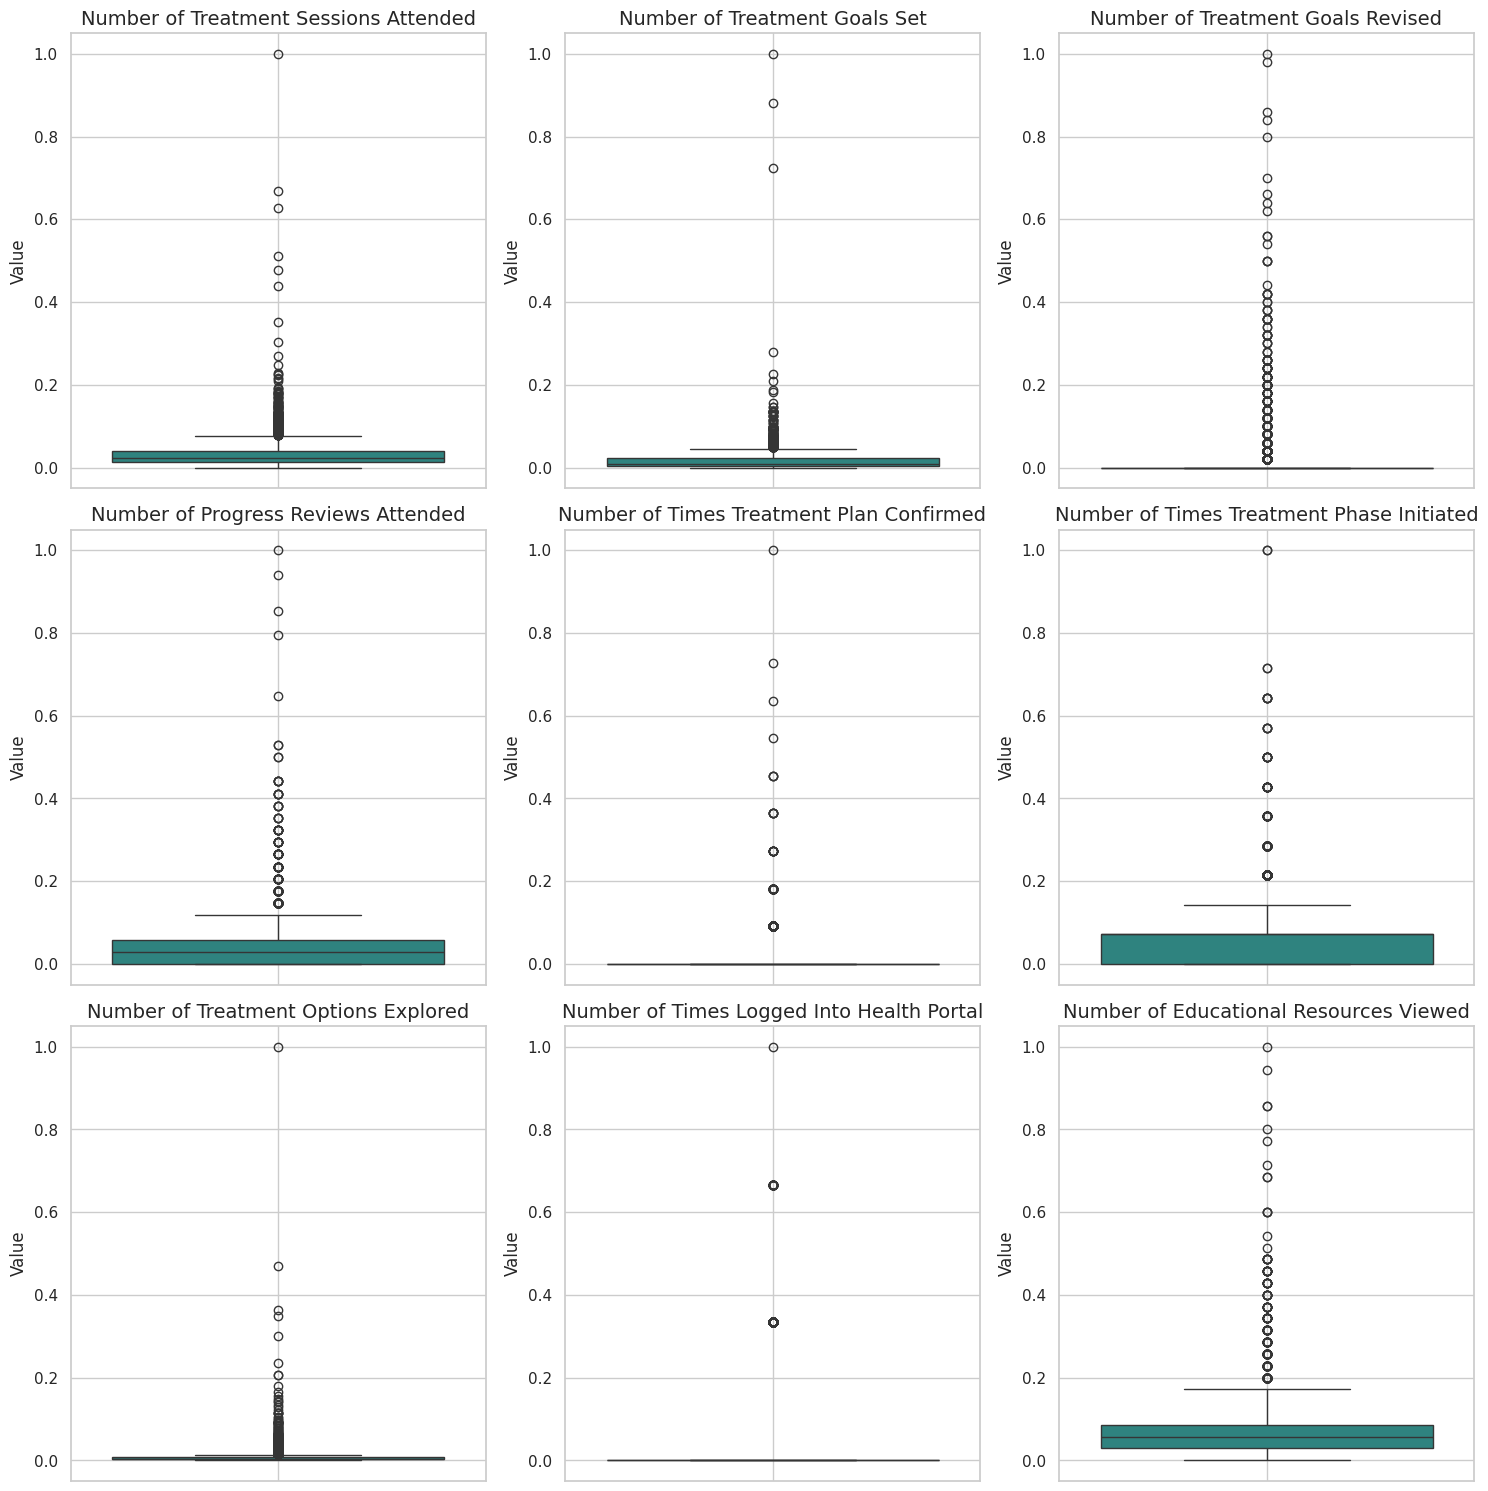

In [ ]:
# Calculate the number of rows needed for subplots
num_rows = (num_cols // 2) + (num_cols % 2 > 0)

# Set the overall figure size
plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size accordingly

# Set the style for the plots
sns.set(style="whitegrid")  # Set the background style of the plots

# Create a boxplot for each numeric column to visualize outliers
for i, col in enumerate(features, 1):
    plt.subplot(num_rows, 3, i)  # Create a subplot for each numeric column
    sns.boxplot(y=data[col], palette='viridis')  # Change palette for better aesthetics
    plt.title(col, fontsize=14)  # Increase title font size
    plt.xlabel('')  # Remove xlabel for clarity (optional)
    plt.ylabel('Value', fontsize=12)  # Label for y-axis
    plt.grid(True)  # Add grid lines for better visualization

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

#Z-Score

   
2. **Positive Z-Score**:
   - Indicates that the value is above the mean.
   - For example, a Z-score of +1 means the value is 1 standard deviation above the mean.

3. **Negative Z-Score**:
   - Indicates that the value is below the mean.
   - For example, a Z-score of -1 means the value is 1 standard deviation below the mean.

4. **Z-score of Zero**:
   - Indicates that the value is exactly equal to the mean.

  **Z-scores help standardize values so that you can easily identify how far a value is from the mean, which is useful for detecting outliers.
Typically, scores with Z-scores greater than 3 or less than -3 can be considered outliers.**





In [ ]:
for feature in features:
    outliers = (abs(zscore(data[feature])) > 3).sum()
    print(f'{col} Number of outliers: {outliers}')

# Z-scores help standardize values so that you can easily identify how far a value is from the mean, which is useful for detecting outliers. Typically, scores with Z-scores greater than 3 or less than -3 can be considered outliers.


Number of Educational Resources Viewed Number of outliers: 53
Number of Educational Resources Viewed Number of outliers: 33
Number of Educational Resources Viewed Number of outliers: 76
Number of Educational Resources Viewed Number of outliers: 81
Number of Educational Resources Viewed Number of outliers: 63
Number of Educational Resources Viewed Number of outliers: 64
Number of Educational Resources Viewed Number of outliers: 38
Number of Educational Resources Viewed Number of outliers: 40
Number of Educational Resources Viewed Number of outliers: 96


# IQ Range

To find outliers using the **Interquartile Range (IQR)** method, you can follow these steps:

### Steps to Identify Outliers Using IQR

1. **Calculate the Quartiles**:
   - Determine the first quartile (\(Q1\)) and the third quartile (\(Q3\)) of your dataset.

2. **Calculate the Interquartile Range (IQR)**:
   - IQR is calculated as:

   \[
   \text{IQR} = Q3 - Q1
   \]

3. **Determine Outlier Boundaries**:
   - Outliers are typically defined as values that lie below \(Q1 - 1.5 \times \text{IQR}\) or above \(Q3 + 1.5 \times \text{IQR}\).

4. **Identify Outliers**:
   - Identify which values fall outside the calculated boundaries.



In [ ]:
for col in features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    print(f'{col} Number of outliers (IQR method): {num_outliers}')


Number of Treatment Sessions Attended Number of outliers (IQR method): 268
Number of Treatment Goals Set Number of outliers (IQR method): 254
Number of Treatment Goals Revised Number of outliers (IQR method): 855
Number of Progress Reviews Attended Number of outliers (IQR method): 228
Number of Times Treatment Plan Confirmed Number of outliers (IQR method): 687
Number of Times Treatment Phase Initiated Number of outliers (IQR method): 327
Number of Treatment Options Explored Number of outliers (IQR method): 657
Number of Times Logged Into Health Portal Number of outliers (IQR method): 684
Number of Educational Resources Viewed Number of outliers (IQR method): 292


# Removing Outliers

In [ ]:
z_scores = zscore(data[features].dropna())

# Create a boolean mask for rows without outliers
mask = (abs(z_scores) <= 3).all(axis=1)

# Remove outliers
datafin= data[mask]

# Display the shape of the original and new DataFrame
print("Original DataFrame shape:", data.shape)
print("New DataFrame shape (without outliers):", datafin.shape)

Original DataFrame shape: (4284, 12)
New DataFrame shape (without outliers): (3883, 12)


# Correlation Matrix

Text(0.5, 1.0, 'Coorelation Graph')

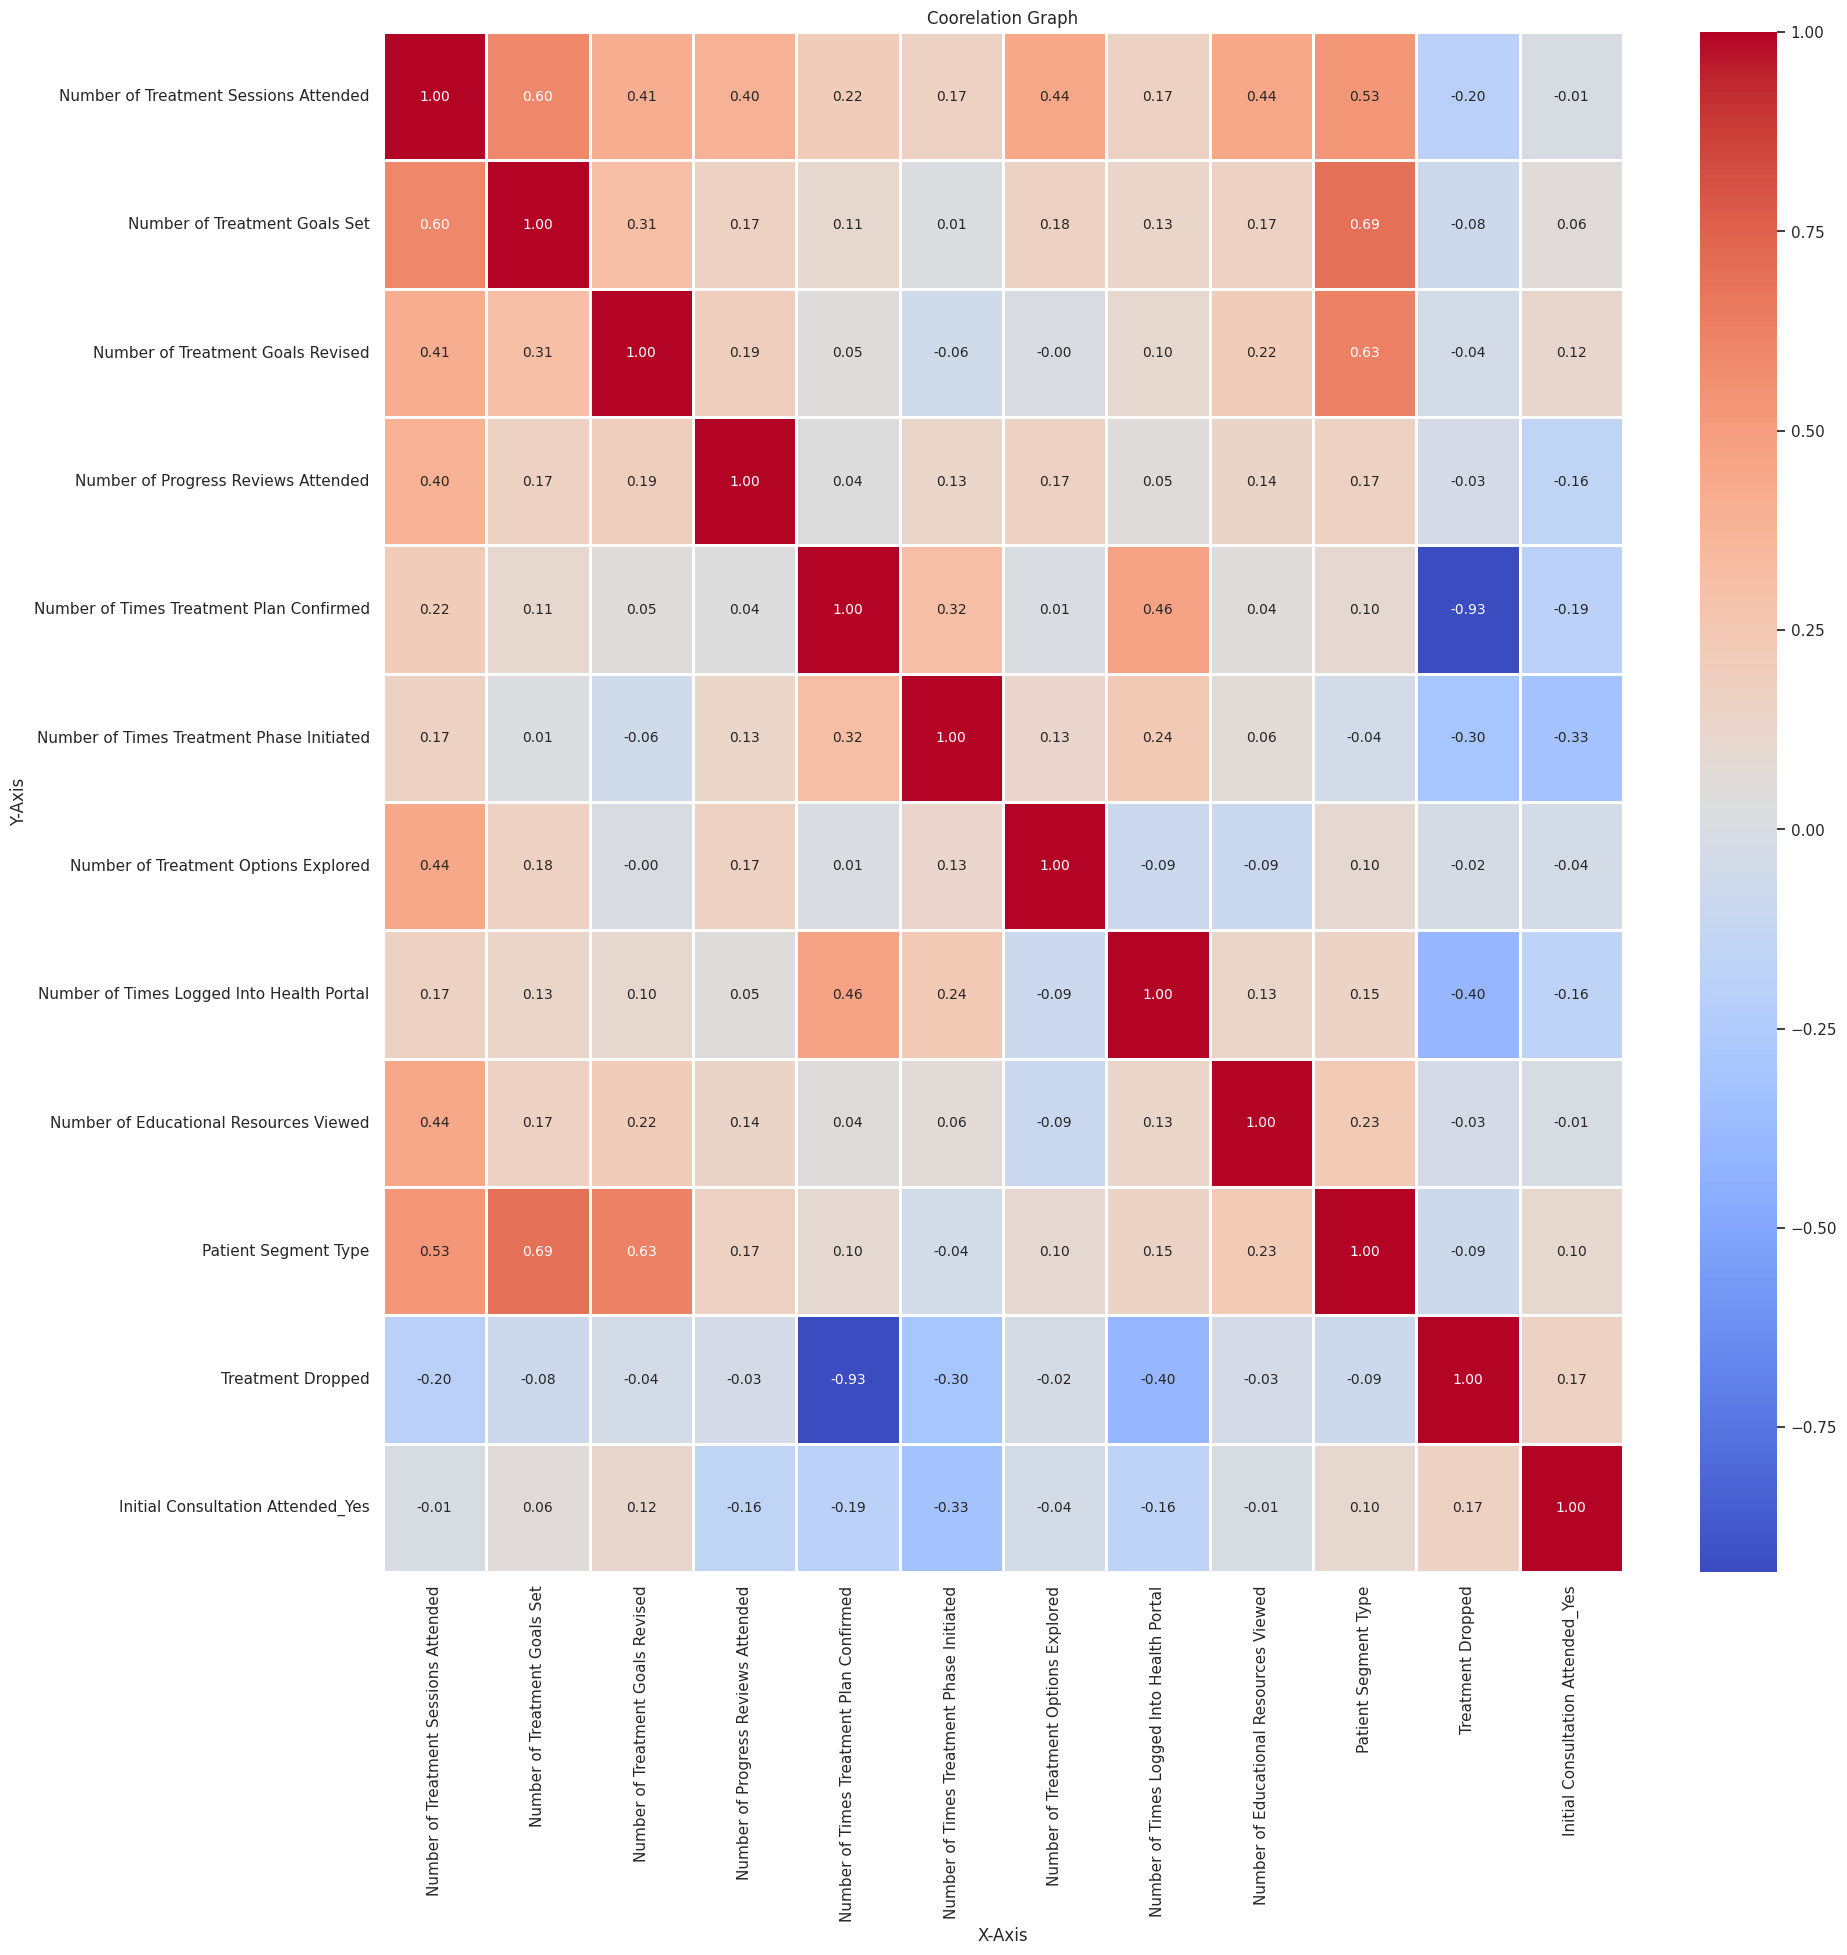

In [ ]:



corr=datafin.corr()
plt.figure(figsize=(20, 20))  # Optional: Adjust figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=2, fmt=".2f", annot_kws={"size": 10})
# Add labels and title (customize as needed)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Coorelation Graph")

# VIF

Interpreting VIF Values
VIF = 1: No correlation with other variables (no multicollinearity).

1 < VIF < 5: Moderate correlation that may be acceptable.

VIF >= 5: High correlation, indicating significant multicollinearity, which could lead to issues in regression analysis.

VIF > 10: Indicates severe multicollinearity. Consider removing or combining variables.

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):

    features = []
    vif_values = []

    # Loop through each feature index
    for i in range(X.shape[1]):
        # Calculate VIF for the feature at index i
        vif = variance_inflation_factor(X.values, i)


        features.append(X.columns[i])
        vif_values.append(vif)

    vif_data = pd.DataFrame({
        "Feature": features,
        "VIF": vif_values
    })

    return vif_data

# Calculate VIF
vif_data = calculate_vif(datafin[features])
print(vif_data)


                                     Feature        VIF
0      Number of Treatment Sessions Attended  10.534882
1              Number of Treatment Goals Set   2.888563
2          Number of Treatment Goals Revised   1.449601
3        Number of Progress Reviews Attended   2.176130
4   Number of Times Treatment Plan Confirmed   1.649211
5  Number of Times Treatment Phase Initiated   2.114181
6       Number of Treatment Options Explored   2.522657
7  Number of Times Logged Into Health Portal   1.570928
8     Number of Educational Resources Viewed   2.854127



# PCA
Principal Component Analysis (PCA) works by transforming the original features of a dataset into a new set of orthogonal (uncorrelated) variables known as **principal components**. These components are ordered by the amount of variance they capture from the original data. Here’s a step-by-step explanation of how PCA is performed:

### Steps Involved in PCA

1. **Standardization**:
   - Since PCA is affected by the scale of the variables, the first step is to standardize the dataset so that each feature has a mean of 0 and a standard deviation of 1.
   - This can be done using the formula:
     \[
     z = \frac{(x - \mu)}{\sigma}
     \]
     where:
     - \( x \) is the original feature value,
     - \( \mu \) is the mean of the feature,
     - \( \sigma \) is the standard deviation of the feature.

   **Example**: If the original feature values are [4, 5, 6], the mean (\(\mu\)) is 5, and the standard deviation (\(\sigma\)) is approximately 0.816. The standardized values will be:
   - \( z_1 = \frac{(4 - 5)}{0.816} \approx -1.225 \)
   - \( z_2 = \frac{(5 - 5)}{0.816} = 0 \)
   - \( z_3 = \frac{(6 - 5)}{0.816} \approx 1.225 \)

2. **Covariance Matrix Calculation**:
   - The next step is to compute the covariance matrix of the standardized features. The covariance matrix captures how much the dimensions vary from the mean with respect to each other.
   - For a dataset with two features \(X\) and \(Y\), the covariance matrix can be represented as:
     \[
     \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
     \]
   - The covariance matrix for a dataset with multiple features is a square matrix, where each element \((i,j)\) is the covariance between features \(i\) and \(j\).

   **Example**: If we have two features \(X\) and \(Y\), the covariance matrix might look like this:
   \[
   \text{Cov}(X, Y) = \begin{bmatrix}
   \text{Var}(X) & \text{Cov}(X,Y) \\
   \text{Cov}(Y,X) & \text{Var}(Y)
   \end{bmatrix}
   \]

3. **Eigenvalue and Eigenvector Calculation**:
   - From the covariance matrix, calculate the eigenvalues and eigenvectors. Eigenvalues measure the variance explained by each principal component, while eigenvectors provide the direction of these components.
   - The eigenvalues and eigenvectors can be computed using a method such as Singular Value Decomposition (SVD) or through direct matrix operations.

4. **Selecting Principal Components**:
   - Sort the eigenvalues in descending order. The eigenvectors corresponding to the largest eigenvalues are the principal components.
   - Choose the top **k** principal components based on the desired level of variance you want to retain (e.g., 95% of the variance).

5. **Transforming the Data**:
   - Project the original standardized data onto the new feature space defined by the selected principal components.
   - This is done by multiplying the standardized data matrix by the matrix of selected eigenvectors.
   - The formula for transformation is:
     \[
     Y = X \cdot W
     \]
     where:
     - \(Y\) is the transformed dataset,
     - \(X\) is the standardized data,
     - \(W\) is the matrix of selected eigenvectors.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(datafin[features])

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)



# Step 4: Create a new DataFrame with the principal components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Optional: Add the target variable back to the PCA DataFrame
datafin['Treatment Dropped'] = datafin['Treatment Dropped'].values


In [ ]:
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.940201,-0.273724,-0.134570,-0.817082,0.177389,-0.061859,-0.189687,0.020013
1,1.227009,-1.356544,0.340118,0.481201,-0.164906,-0.835181,-0.970829,0.318186
2,-0.224163,1.555822,0.339388,-1.538033,0.044605,0.109165,0.372915,1.926291
3,-1.135574,-0.776533,1.061115,-0.076614,0.931753,-0.573471,-0.856541,-0.135293
4,0.324516,-0.399045,-0.852708,0.199149,-1.791943,0.050984,0.636505,0.119538


# Train and Test Split

In [ ]:
X=datafin.drop(columns=['Treatment Dropped'])
Y=datafin['Treatment Dropped']

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split  # For splitting the data into training and test sets
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # For evaluation metrics



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=900)  # Adjust max_iter as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.9215
Precision: 0.9328
Recall: 0.9809
F1-score: 0.9562
ROC AUC: 0.9727


# K FOLD Cross Validation

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Assuming 'data' is your DataFrame containing features and target variable
X = data.drop(columns=['Treatment Dropped'])
y = data['Treatment Dropped']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of C values to test
c_values = [0.01, 0.1, 1, 10, 100]

# Initialize lists to store results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Iterate through different C values
for c in c_values:
    # Create and train the Logistic Regression model with L2 regularization
    model = LogisticRegression(penalty='l2', C=c, max_iter=1000, solver='liblinear', class_weight='balanced')

    # Perform K-Fold Cross-Validation and store the scores
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

    # Store the mean of the metrics
    accuracy_scores.append(cv_accuracy.mean())
    precision_scores.append(cv_precision.mean())
    recall_scores.append(cv_recall.mean())
    f1_scores.append(cv_f1.mean())
    roc_auc_scores.append(cv_roc_auc.mean())

# Print the results for each C value
for i, c in enumerate(c_values):
    print(f"C = {c}")
    print(f"  Mean Accuracy: {accuracy_scores[i]:.4f}")
    print(f"  Mean Precision: {precision_scores[i]:.4f}")
    print(f"  Mean Recall: {recall_scores[i]:.4f}")
    print(f"  Mean F1-score: {f1_scores[i]:.4f}")
    print(f"  Mean ROC AUC: {roc_auc_scores[i]:.4f}")

# Determine the best C value based on your preferred metric (e.g., F1-score)
best_c_index = f1_scores.index(max(f1_scores))  # Example: choose the C with the highest F1-score
best_c = c_values[best_c_index]
print(f"\nBest C value (based on F1-score): {best_c}")

# Fit the model to the entire dataset with the best C value
best_model = LogisticRegression(penalty='l2', C=best_c, max_iter=900, solver='liblinear', class_weight='balanced')
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Calculate and display all metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Print the test set evaluation metrics
print("\nTest Set Evaluation Metrics:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")


C = 0.01
  Mean Accuracy: 0.6930
  Mean Precision: 0.9386
  Mean Recall: 0.6876
  Mean F1-score: 0.7935
  Mean ROC AUC: 0.8194
C = 0.1
  Mean Accuracy: 0.8713
  Mean Precision: 0.9688
  Mean Recall: 0.8782
  Mean F1-score: 0.9213
  Mean ROC AUC: 0.9064
C = 1
  Mean Accuracy: 0.9583
  Mean Precision: 0.9954
  Mean Recall: 0.9558
  Mean F1-score: 0.9752
  Mean ROC AUC: 0.9814
C = 10
  Mean Accuracy: 0.9819
  Mean Precision: 0.9993
  Mean Recall: 0.9797
  Mean F1-score: 0.9894
  Mean ROC AUC: 0.9863
C = 100
  Mean Accuracy: 0.9819
  Mean Precision: 0.9993
  Mean Recall: 0.9797
  Mean F1-score: 0.9894
  Mean ROC AUC: 0.9899

Best C value (based on F1-score): 10

Test Set Evaluation Metrics:
Test Accuracy: 0.9837
Test Precision: 1.0000
Test Recall: 0.9807
Test F1-score: 0.9903
Test ROC AUC: 0.9872


In [ ]:
datafin.to_csv('updated_data.csv', index=False)